In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Check seaborn version
print(f"Seaborn version: {sns.__version__}")


ModuleNotFoundError: No module named 'seaborn'

In [2]:

# Install seaborn
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



# Simple Seaborn Plots

Let's explore a few common types of Seaborn plots with sample data:

1. **Scatterplot**
2. **Line plot**
3. **Bar plot**
4. **Distribution plot**
5. **Heatmap**

First we'll set up our environment and create some sample data.


In [3]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for better aesthetics
sns.set_theme(style="whitegrid")


In [4]:

# Create a sample dataset
np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    'x': np.random.normal(0, 1, 100),
    'y': np.random.normal(0, 1, 100),
    'category': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'value': np.random.uniform(0, 10, 100),
    'size': np.random.randint(10, 100, 100)
})

# Take a look at our data
data.head()


,x,y,category,value,size
0,0.496714,-1.415371,B,8.359801,25
1,-0.138264,-0.420645,B,6.959742,78
2,0.647689,-0.342715,A,4.089529,21
3,1.523030,-0.802277,D,1.732943,34
4,-0.234153,-0.161286,A,1.564370,61


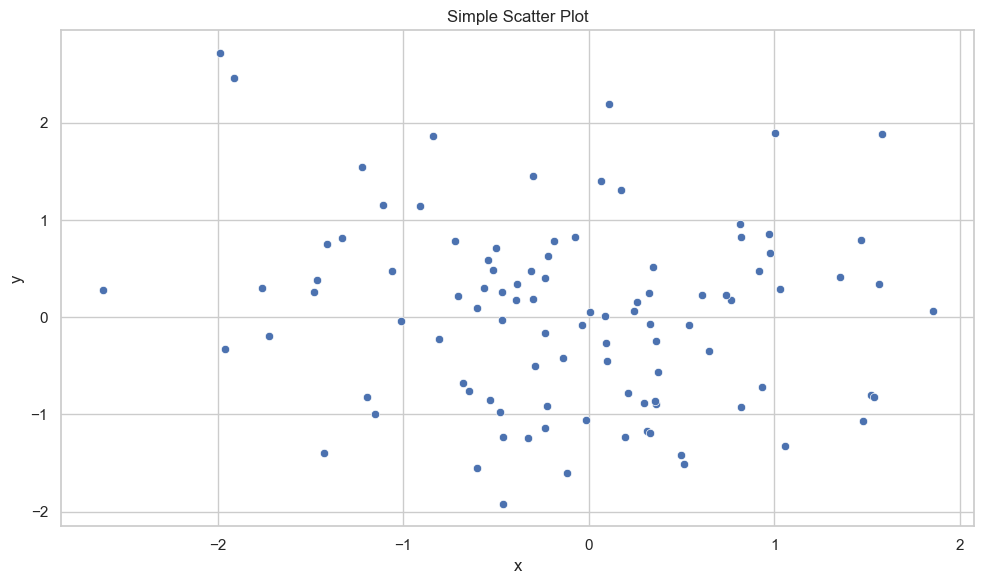

In [5]:

# Create a simple scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='x', y='y')
plt.title('Simple Scatter Plot')
plt.tight_layout()
plt.show()


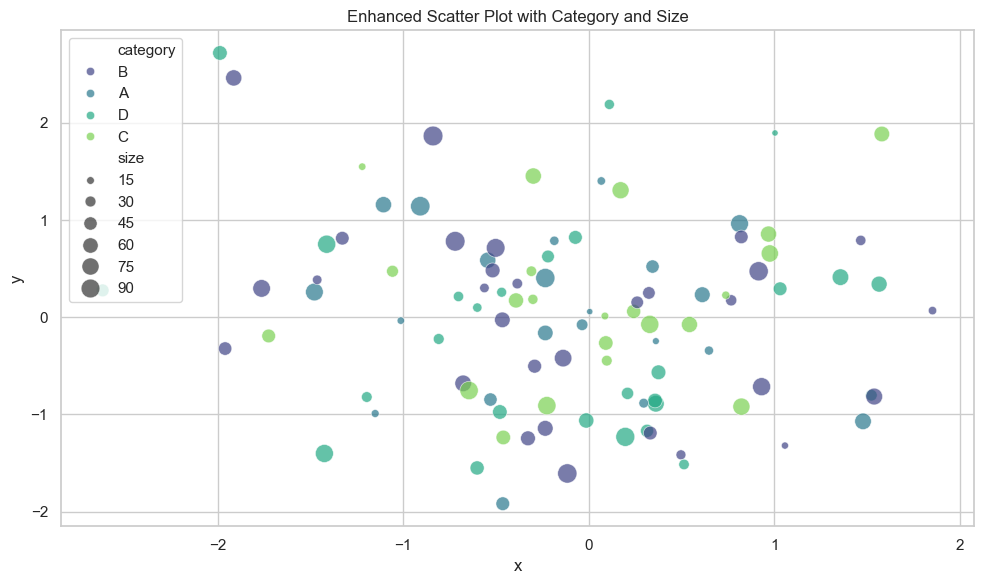

In [6]:

# Enhanced scatter plot with hue and size parameters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='x', y='y', hue='category', size='size', 
                sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Enhanced Scatter Plot with Category and Size')
plt.tight_layout()
plt.show()


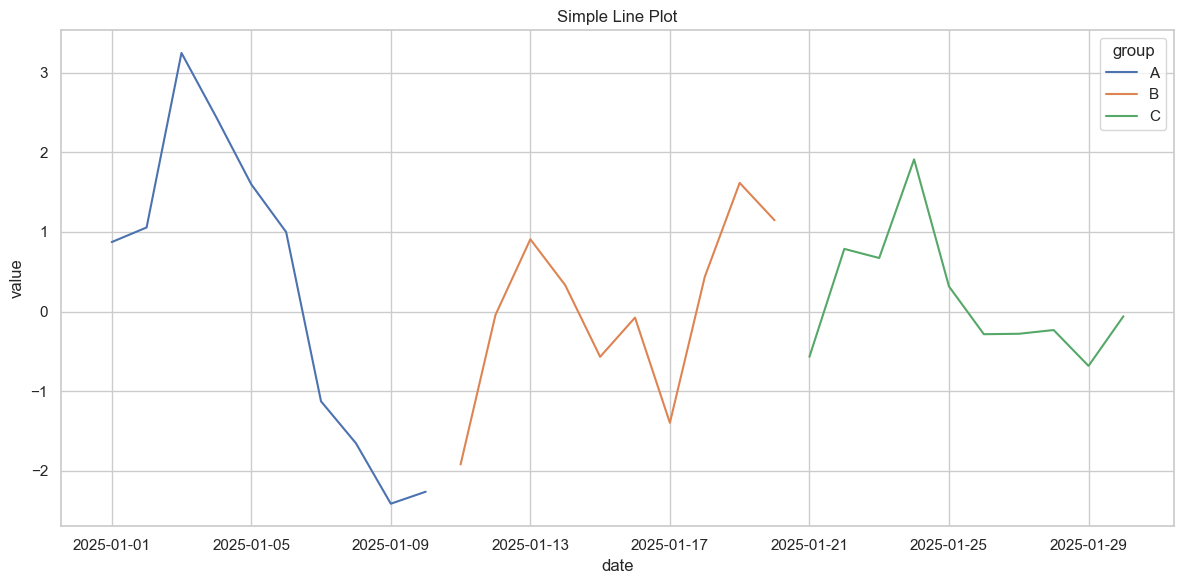

In [7]:

# Create some time series data
dates = pd.date_range('2025-01-01', periods=30)
time_data = pd.DataFrame({
    'date': dates,
    'value': np.cumsum(np.random.randn(30)),
    'group': np.repeat(['A', 'B', 'C'], 10)
})

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_data, x='date', y='value', hue='group')
plt.title('Simple Line Plot')
plt.tight_layout()
plt.show()


/var/folders/dj/tr2928rn6_3d6f1w3s4n_1r40000gp/T/ipykernel_5621/610550601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means, x='category', y='value', palette='pastel')


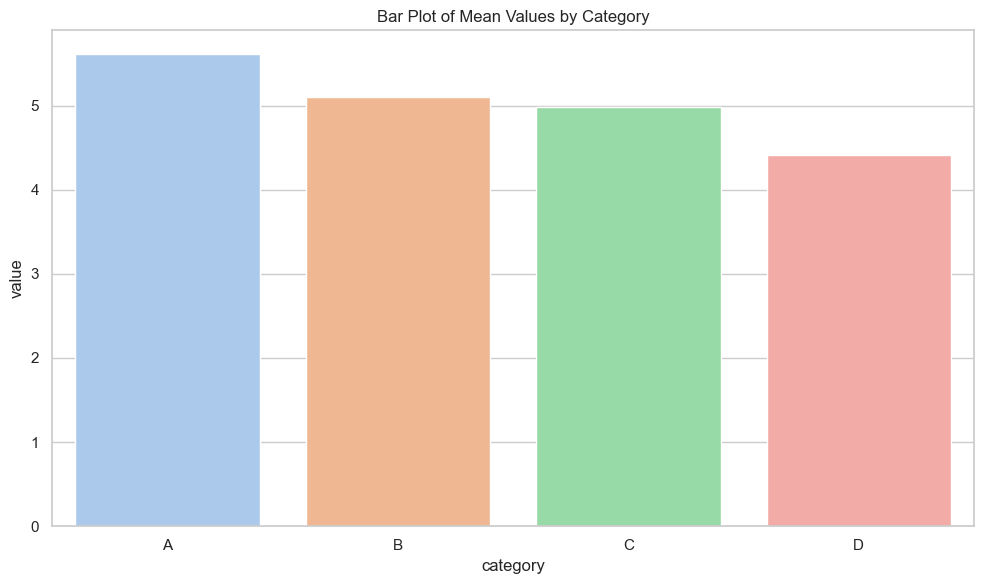

In [8]:

# Aggregate data for bar plot
category_means = data.groupby('category')['value'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=category_means, x='category', y='value', palette='pastel')
plt.title('Bar Plot of Mean Values by Category')
plt.tight_layout()
plt.show()


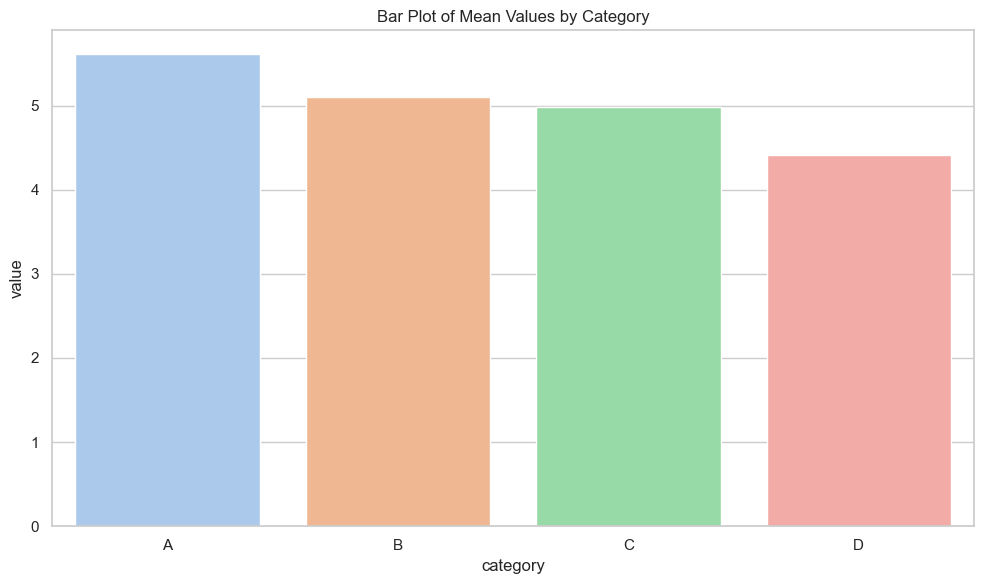

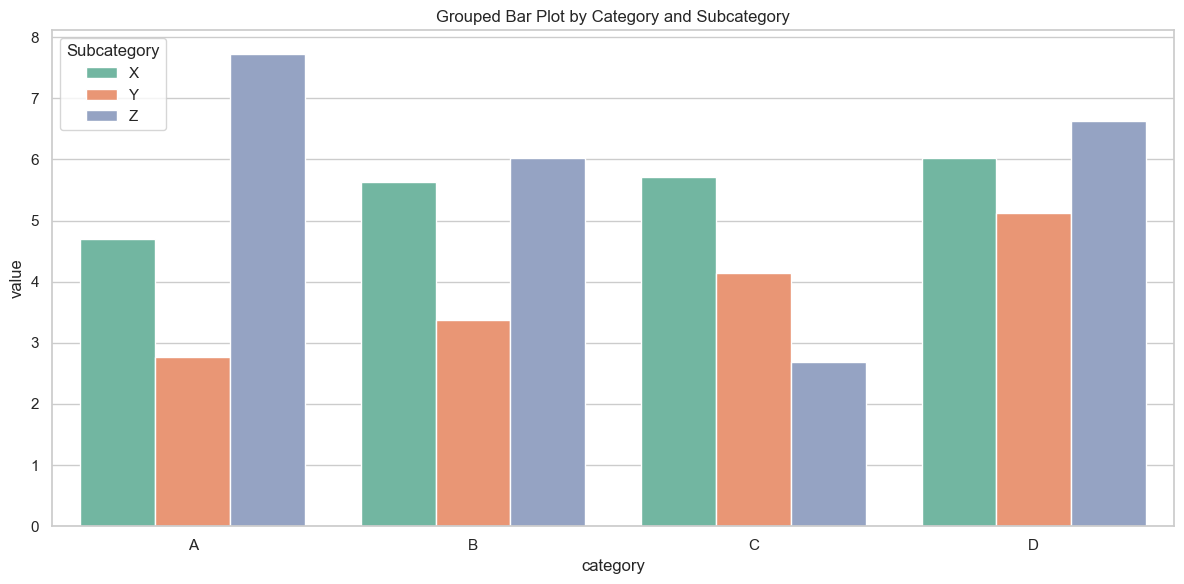

In [9]:

# Updated bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=category_means, x='category', y='value', hue='category', palette='pastel', legend=False)
plt.title('Bar Plot of Mean Values by Category')
plt.tight_layout()
plt.show()

# Create a grouped bar plot with sub-categories
# First, let's create some grouped data
grouped_data = pd.DataFrame({
    'category': np.repeat(['A', 'B', 'C', 'D'], 3),
    'subcategory': np.tile(['X', 'Y', 'Z'], 4),
    'value': np.random.uniform(2, 8, 12)
})

# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='category', y='value', hue='subcategory', palette='Set2')
plt.title('Grouped Bar Plot by Category and Subcategory')
plt.legend(title='Subcategory')
plt.tight_layout()
plt.show()


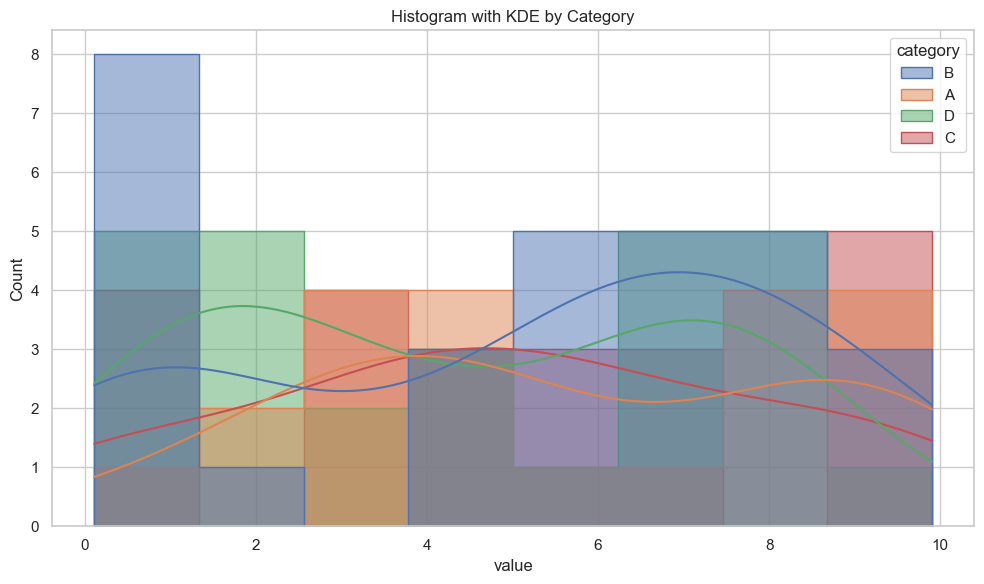

/var/folders/dj/tr2928rn6_3d6f1w3s4n_1r40000gp/T/ipykernel_5621/711574539.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', palette='Set3')


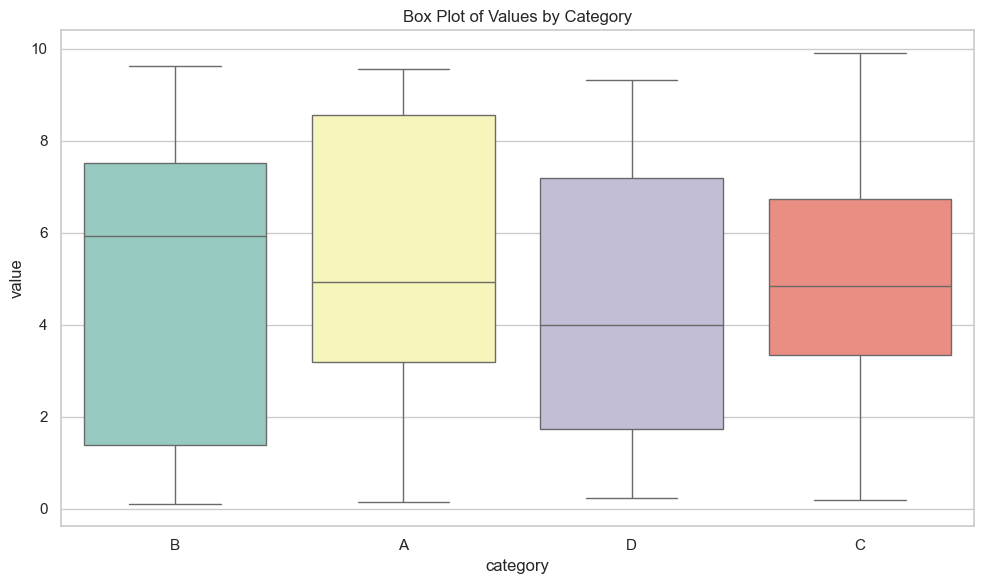

/var/folders/dj/tr2928rn6_3d6f1w3s4n_1r40000gp/T/ipykernel_5621/711574539.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='category', y='value', palette='Set3', inner='quartile')


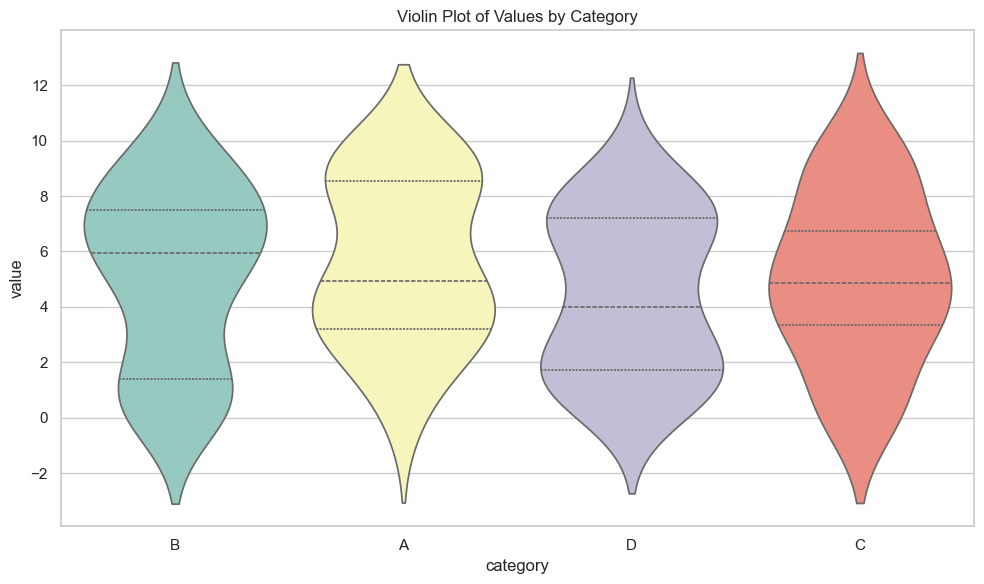

In [10]:

# Histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='value', kde=True, hue='category', element='step', common_norm=False, alpha=0.5)
plt.title('Histogram with KDE by Category')
plt.tight_layout()
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='category', y='value', palette='Set3')
plt.title('Box Plot of Values by Category')
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='category', y='value', palette='Set3', inner='quartile')
plt.title('Violin Plot of Values by Category')
plt.tight_layout()
plt.show()


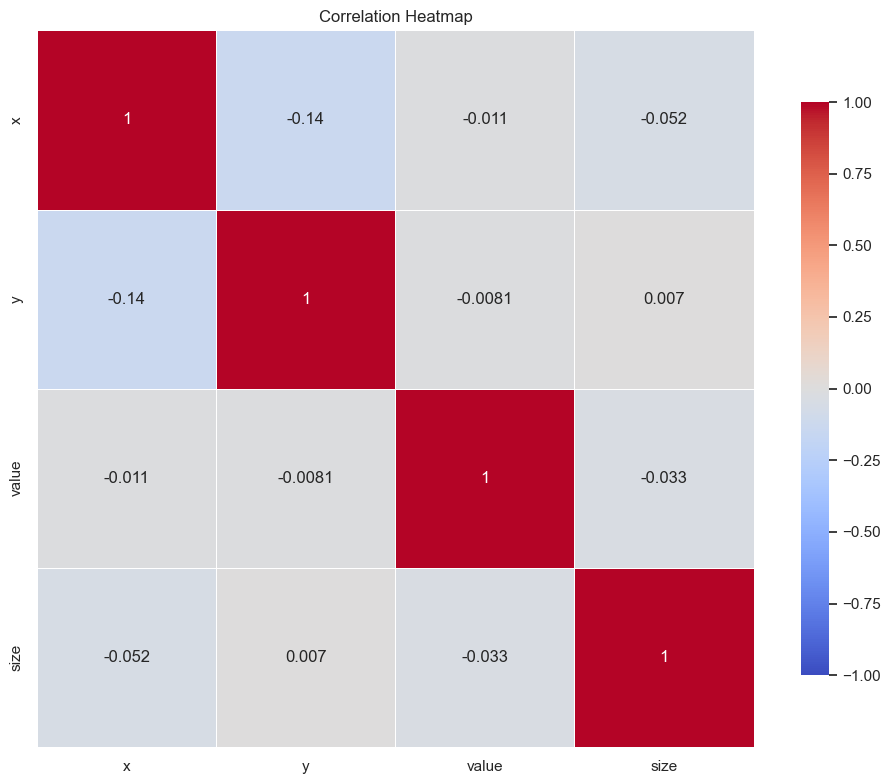

In [11]:

# Create a correlation matrix
corr_matrix = data[['x', 'y', 'value', 'size']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


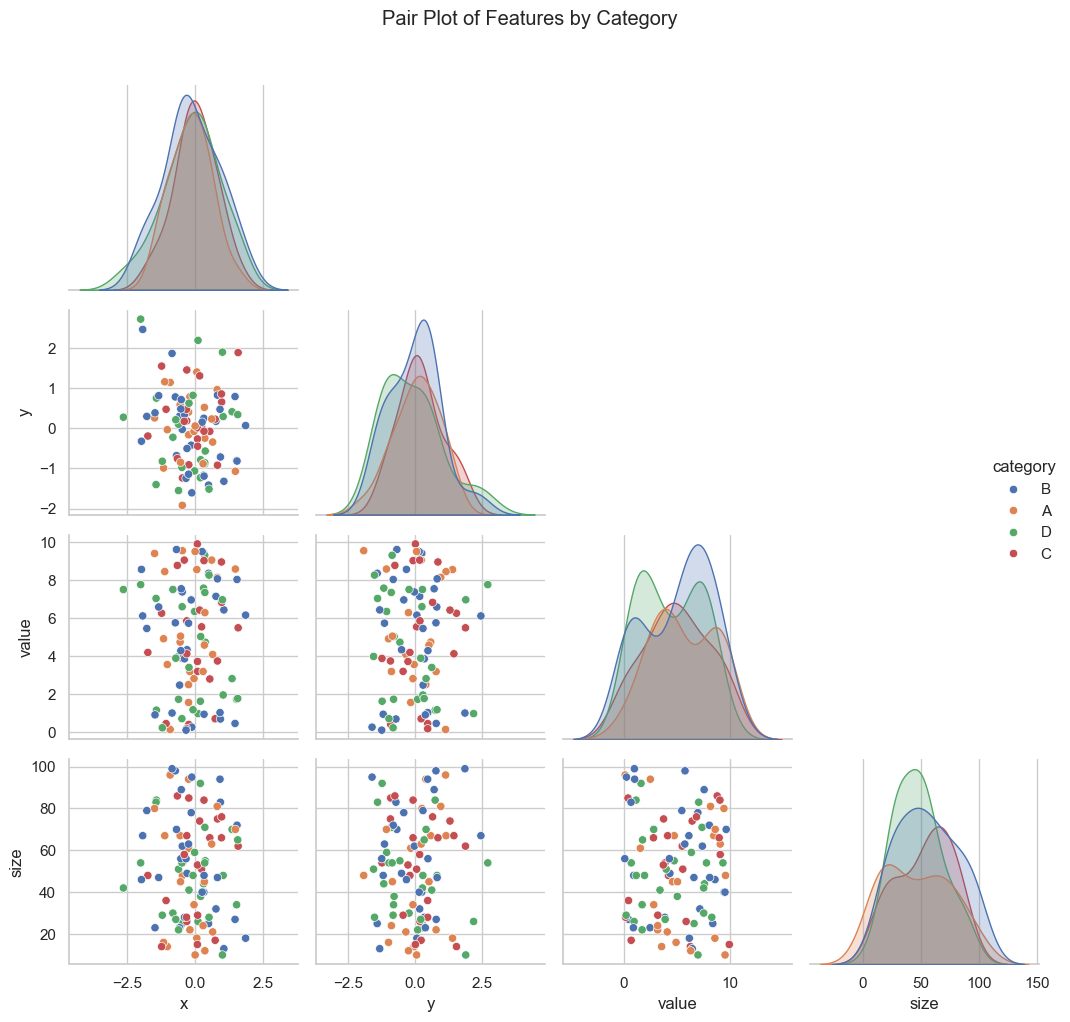

In [12]:

# Create a pair plot
sns.pairplot(data[['x', 'y', 'value', 'size', 'category']], hue='category', 
             corner=True, diag_kind='kde')
plt.suptitle('Pair Plot of Features by Category', y=1.02)
plt.tight_layout()
plt.show()



## Practical Example: Student Performance Analysis

Let's create a more realistic example by generating data that mimics student performance across different subjects and analyze it with Seaborn visualizations.


In [13]:

# Generate student performance data
np.random.seed(42)
n_students = 200

# Generate student data
students_data = pd.DataFrame({
    'student_id': range(1, n_students + 1),
    'gender': np.random.choice(['Male', 'Female'], n_students),
    'age': np.random.randint(18, 25, n_students),
    'hours_studied': np.random.normal(15, 5, n_students).round(1).clip(5, 30),
    'previous_gpa': np.random.normal(3.0, 0.5, n_students).round(2).clip(1.0, 4.0),
    'extracurricular': np.random.choice(['Yes', 'No'], n_students),
    'math_score': np.zeros(n_students),
    'science_score': np.zeros(n_students),
    'literature_score': np.zeros(n_students),
    'program': np.random.choice(['Science', 'Arts', 'Business'], n_students)
})

# Create some correlation between study hours, previous GPA and scores
for i in range(n_students):
    base = students_data.loc[i, 'hours_studied'] / 30 * 70 + students_data.loc[i, 'previous_gpa'] / 4 * 30
    
    # Add some randomness and subject-specific variations
    students_data.loc[i, 'math_score'] = min(100, max(40, base + 
                                                     (10 if students_data.loc[i, 'program'] == 'Science' else -5) +
                                                     np.random.normal(0, 10)))
    
    students_data.loc[i, 'science_score'] = min(100, max(40, base + 
                                                       (10 if students_data.loc[i, 'program'] == 'Science' else 0) +
                                                       np.random.normal(0, 10)))
    
    students_data.loc[i, 'literature_score'] = min(100, max(40, base + 
                                                          (15 if students_data.loc[i, 'program'] == 'Arts' else 0) +
                                                          np.random.normal(0, 10)))

# Round scores to integers
score_columns = ['math_score', 'science_score', 'literature_score']
students_data[score_columns] = students_data[score_columns].round().astype(int)

# Calculate average score
students_data['average_score'] = students_data[score_columns].mean(axis=1).round(1)

# View the data
students_data.head()


,student_id,gender,age,hours_studied,previous_gpa,extracurricular,math_score,science_score,literature_score,program,average_score
0,1,Male,24,19.1,3.11,Yes,69,50,89,Business,69.3
1,2,Female,24,24.5,3.01,No,72,81,82,Business,78.3
2,3,Male,18,13.8,3.05,No,56,40,70,Arts,55.3
3,4,Male,21,11.2,2.61,No,40,40,71,Arts,50.3
4,5,Male,22,10.6,3.01,Yes,40,50,64,Arts,51.3


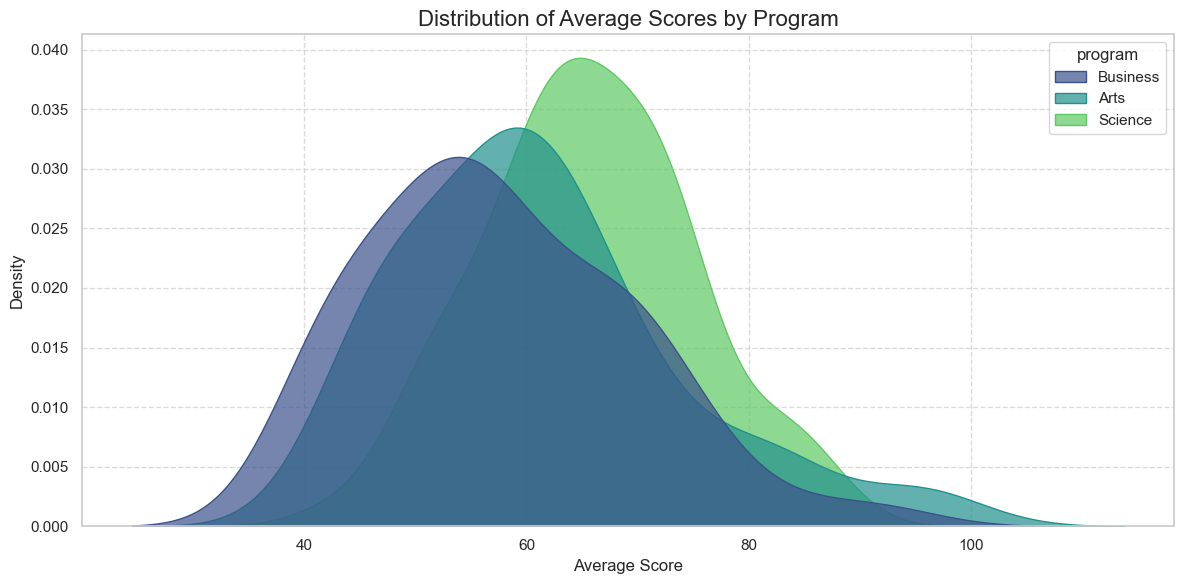

In [14]:

# Set a custom color palette
custom_palette = sns.color_palette("viridis", 3)

# 1. Distribution of Average Scores by Program
plt.figure(figsize=(12, 6))
sns.kdeplot(data=students_data, x='average_score', hue='program', fill=True, common_norm=False, 
           palette=custom_palette, alpha=0.7)
plt.title('Distribution of Average Scores by Program', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


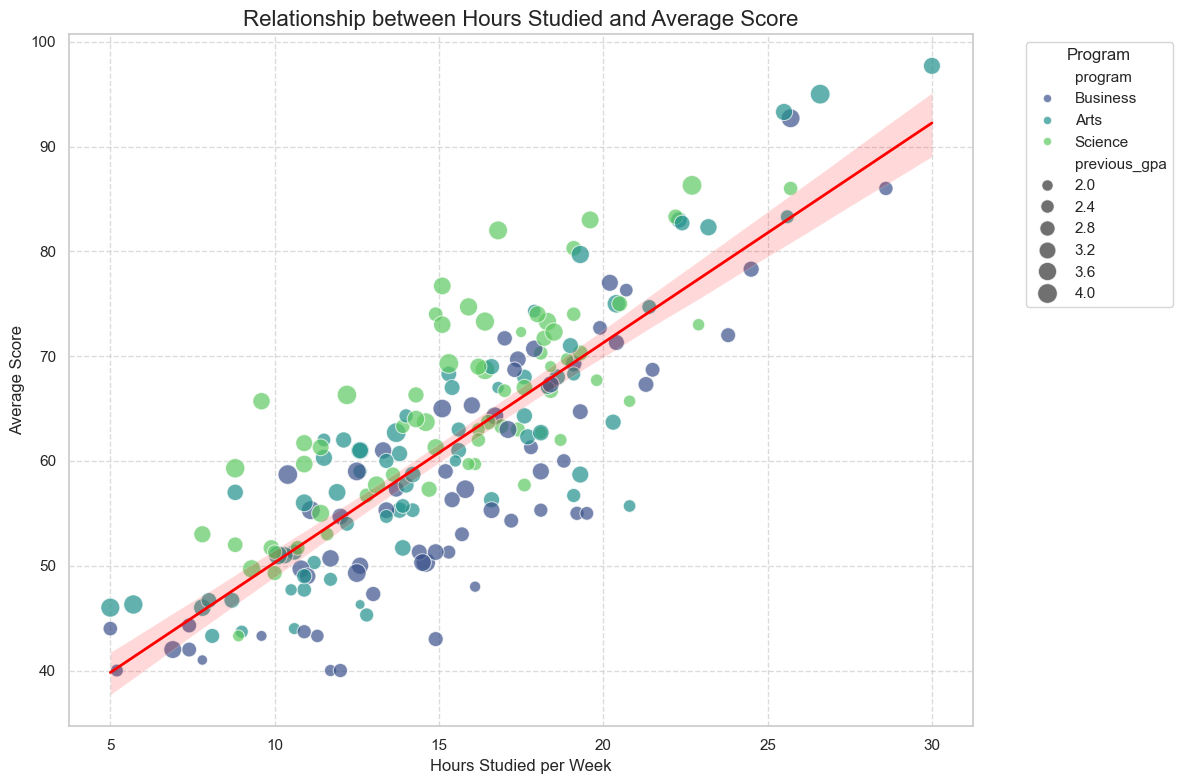

In [15]:

# 2. Relationship between Hours Studied and Average Score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=students_data, x='hours_studied', y='average_score', 
                hue='program', size='previous_gpa', sizes=(50, 200), 
                palette=custom_palette, alpha=0.7)

# Add a regression line
sns.regplot(data=students_data, x='hours_studied', y='average_score', 
            scatter=False, color='red', line_kws={'linewidth': 2})

plt.title('Relationship between Hours Studied and Average Score', fontsize=16)
plt.xlabel('Hours Studied per Week', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


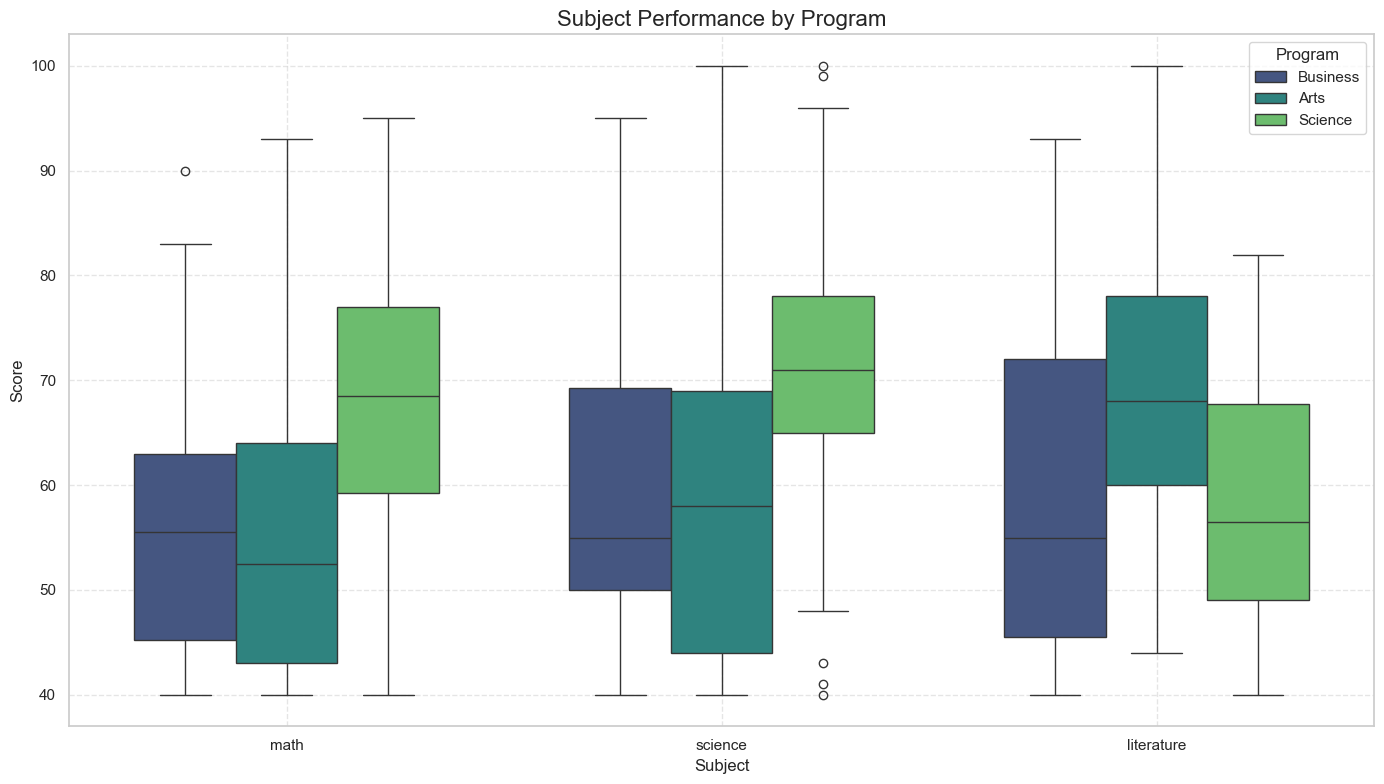

In [16]:

# 3. Subject Performance Comparison by Program
# Melt the data for easier plotting
melted_scores = pd.melt(students_data, 
                        id_vars=['student_id', 'program'], 
                        value_vars=['math_score', 'science_score', 'literature_score'],
                        var_name='subject', value_name='score')

# Clean subject names
melted_scores['subject'] = melted_scores['subject'].str.replace('_score', '')

plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_scores, x='subject', y='score', hue='program', 
            palette=custom_palette, width=0.7)
plt.title('Subject Performance by Program', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Program')
plt.tight_layout()
plt.show()


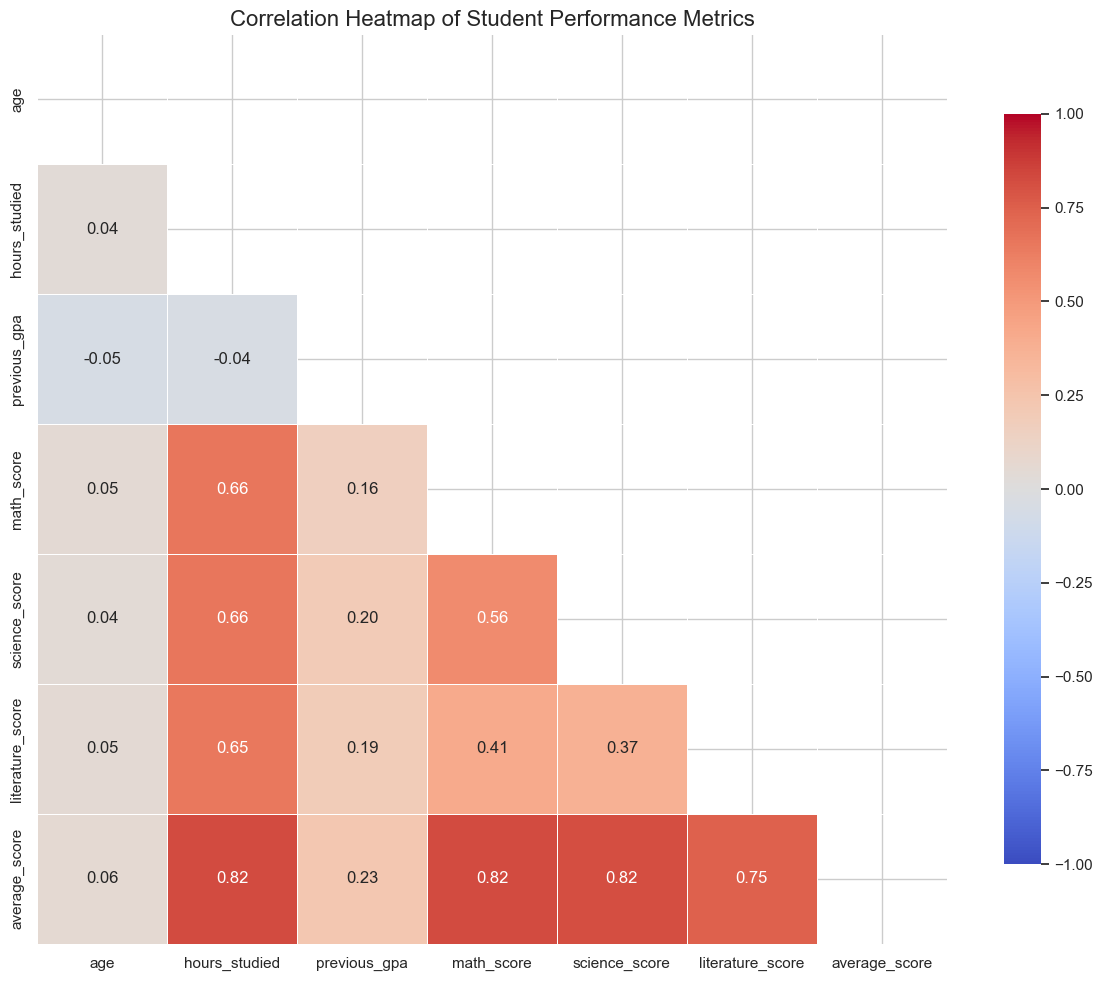

In [17]:

# 4. Correlation Heatmap of Student Metrics
# Select numeric columns
numeric_cols = ['age', 'hours_studied', 'previous_gpa', 'math_score', 
                'science_score', 'literature_score', 'average_score']
corr = students_data[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Student Performance Metrics', fontsize=16)
plt.tight_layout()
plt.show()


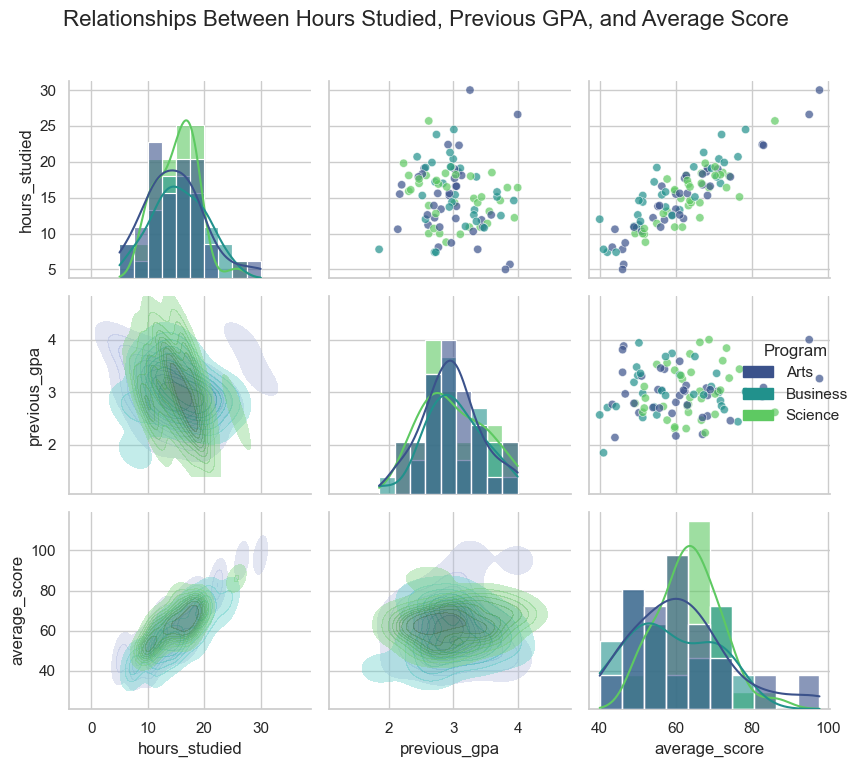

In [18]:

# 5. Pair Grid Plot
# Create a subset of the data
subset_data = students_data[['hours_studied', 'previous_gpa', 'average_score', 'program']].sample(100)

# Create a custom pair grid
g = sns.PairGrid(subset_data, hue="program", palette=custom_palette, height=2.5)
g.map_upper(sns.scatterplot, alpha=0.7)
g.map_lower(sns.kdeplot, fill=True, alpha=0.4)
g.map_diag(sns.histplot, alpha=0.6, kde=True)
g.add_legend(title="Program")
g.fig.suptitle('Relationships Between Hours Studied, Previous GPA, and Average Score', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

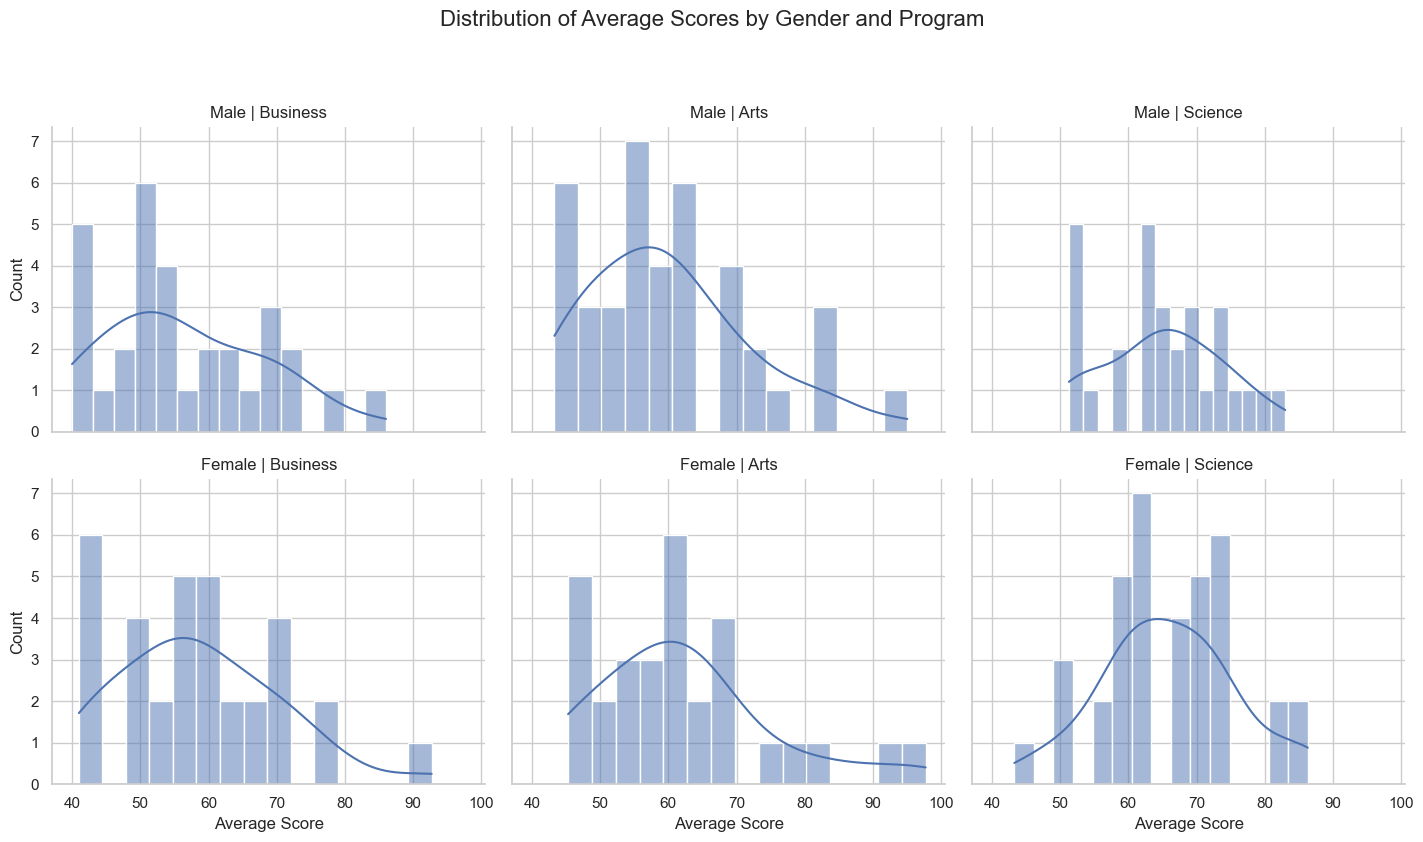

In [19]:

# 6. Faceted Histogram of Scores by Gender and Program
plt.figure(figsize=(15, 8))
g = sns.FacetGrid(students_data, col="program", row="gender", height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x="average_score", kde=True, bins=15)
g.set_axis_labels("Average Score", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.suptitle('Distribution of Average Scores by Gender and Program', y=1.05, fontsize=16)
g.tight_layout()
plt.show()



## Summary: Seaborn Plotting Guide

Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. Here's a quick reference for the main plot types we've covered:

### Basic Plot Types:
1. **scatterplot()** - Display relationship between two numeric variables
2. **lineplot()** - Show trends over time or by a continuous variable
3. **barplot()** - Compare quantities across different categories
4. **histplot()** - Show distribution of a numeric variable
5. **boxplot()** - Display distribution characteristics and outliers
6. **violinplot()** - Show distribution density
7. **heatmap()** - Visualize matrix data like correlations
8. **kdeplot()** - Show smoothed distribution
9. **pairplot()** - Create grid of plots for multiple variables
10. **FacetGrid** - Display multiple plots across categories

### Common Customization Options:
- **hue** - Add a color dimension based on a categorical variable
- **size/sizes** - Vary marker size (for scatter plots)
- **palette** - Change color scheme
- **style** - Change visual style of the plot
- **alpha** - Adjust transparency
- **linewidth** - Adjust line thickness
- **markers** - Change marker style
- **figsize** - Control figure dimensions

### Tips for Better Seaborn Plots

In [20]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")


In [21]:

# We'll use the World Bank API through pandas to download population data
# Documentation: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

# First, let's install pandas-datareader if it's not already installed
!pip install pandas-datareader


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.1 MB ? eta -:--:--

   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/8.1 MB ? eta -:--:--

   ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/8.1 MB 2.1 MB/s eta 0:00:04

   ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/8.1 MB 2.5 MB/s eta 0:00:03

   ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/8.1 MB 2.8 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/8.1 MB 3.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 3.7/8.1 MB 3.3 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 5.0/8.1 MB 3.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 6.0/8.1 MB 3.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 7.3/8.1 MB 4.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.3 MB/s eta 0:00:00


In [22]:

# Let's try downloading directly from a CSV file from World Bank or United Nations
# UN Population Division data is available in CSV format

# Download UN Population Data by country, year, and sex
import requests
import io

# URL for United Nations World Population Prospects data
url = "https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2022_TotalPopulationBySex.csv"

try:
    # Try to download the file
    response = requests.get(url)
    
    if response.status_code == 200:
        # Load the data into a pandas DataFrame
        population_data = pd.read_csv(io.StringIO(response.text))
        print("Data downloaded successfully!")
        print(f"Shape of the data: {population_data.shape}")
        print("\nFirst 5 rows:")
        print(population_data.head())
    else:
        print(f"Failed to download data. Status code: {response.status_code}")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Let's try an alternative approach.")


Failed to download data. Status code: 404


In [23]:

# Let's try using World Bank's API directly or alternative sources

# Let's try downloading population data from the World Bank's World Development Indicators
# First, we'll get total population data
url_population = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=20000&date=2022"

try:
    response = requests.get(url_population)
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        # Check if we have data
        if len(data) > 1 and isinstance(data[1], list):
            # Convert to DataFrame
            df_population = pd.DataFrame(data[1])
            print("Population data downloaded successfully!")
            print(f"Shape: {df_population.shape}")
            print("\nSample of the data:")
            print(df_population.head())
        else:
            print("No data returned or unexpected format")
    else:
        print(f"Failed to download population data. Status code: {response.status_code}")
except Exception as e:
    print(f"An error occurred: {e}")


Population data downloaded successfully!
Shape: (266, 8)

Sample of the data:
                                           indicator  \
0  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
1  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
2  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
3  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
4  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   

                                             country countryiso3code  date  \
0  {'id': 'ZH', 'value': 'Africa Eastern and Sout...             AFE  2022   
1  {'id': 'ZI', 'value': 'Africa Western and Cent...             AFW  2022   
2                {'id': '1A', 'value': 'Arab World'}             ARB  2022   
3    {'id': 'S3', 'value': 'Caribbean small states'}             CSS  2022   
4  {'id': 'B8', 'value': 'Central Europe and the ...             CEB  2022   

         value unit obs_status  decimal  
0  731821393.0                        0  
1  497387180.0                  

In [24]:

# Let's get male and female population data
url_male = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL.MA.IN?format=json&per_page=20000&date=2022"
url_female = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL.FE.IN?format=json&per_page=20000&date=2022"

try:
    # Get male population data
    response_male = requests.get(url_male)
    if response_male.status_code == 200:
        data_male = response_male.json()
        if len(data_male) > 1 and isinstance(data_male[1], list):
            df_male = pd.DataFrame(data_male[1])
            print("Male population data downloaded successfully!")
            print(f"Shape: {df_male.shape}")
        else:
            print("No male data returned or unexpected format")
    else:
        print(f"Failed to download male population data. Status code: {response_male.status_code}")
    
    # Get female population data
    response_female = requests.get(url_female)
    if response_female.status_code == 200:
        data_female = response_female.json()
        if len(data_female) > 1 and isinstance(data_female[1], list):
            df_female = pd.DataFrame(data_female[1])
            print("Female population data downloaded successfully!")
            print(f"Shape: {df_female.shape}")
        else:
            print("No female data returned or unexpected format")
    else:
        print(f"Failed to download female population data. Status code: {response_female.status_code}")
    
except Exception as e:
    print(f"An error occurred: {e}")


Male population data downloaded successfully!
Shape: (266, 8)


Female population data downloaded successfully!
Shape: (266, 8)


In [25]:

# Process the population data to extract country names, codes, and population values

# Process total population data
df_population['country_name'] = df_population['country'].apply(lambda x: x['value'])
df_population['country_code'] = df_population['country'].apply(lambda x: x['id'])
df_population.rename(columns={'value': 'total_population'}, inplace=True)

# Process male population data
df_male['country_name'] = df_male['country'].apply(lambda x: x['value'])
df_male['country_code'] = df_male['country'].apply(lambda x: x['id'])
df_male.rename(columns={'value': 'male_population'}, inplace=True)

# Process female population data
df_female['country_name'] = df_female['country'].apply(lambda x: x['value'])
df_female['country_code'] = df_female['country'].apply(lambda x: x['id'])
df_female.rename(columns={'value': 'female_population'}, inplace=True)

# Let's see what our processed data looks like
print("Processed total population data:")
print(df_population[['country_name', 'country_code', 'total_population']].head())
print("\nProcessed male population data:")
print(df_male[['country_name', 'country_code', 'male_population']].head())
print("\nProcessed female population data:")
print(df_female[['country_name', 'country_code', 'female_population']].head())


Processed total population data:
                     country_name country_code  total_population
0     Africa Eastern and Southern           ZH       731821393.0
1      Africa Western and Central           ZI       497387180.0
2                      Arab World           1A       471352066.0
3          Caribbean small states           S3         3131505.0
4  Central Europe and the Baltics           B8       100289401.0

Processed male population data:
                     country_name country_code  male_population
0     Africa Eastern and Southern           ZH      362165890.0
1      Africa Western and Central           ZI      250438879.0
2                      Arab World           1A      243737501.0
3          Caribbean small states           S3        1540054.0
4  Central Europe and the Baltics           B8       48589815.0

Processed female population data:
                     country_name country_code  female_population
0     Africa Eastern and Southern           ZH        36965

In [26]:

# Merge the three datasets based on country code and name
merged_df = df_population[['country_name', 'country_code', 'total_population', 'countryiso3code']]
merged_df = merged_df.merge(
    df_male[['country_code', 'male_population']], 
    on='country_code', 
    how='left'
)
merged_df = merged_df.merge(
    df_female[['country_code', 'female_population']], 
    on='country_code', 
    how='left'
)

# Convert population values to numeric and handle missing values
merged_df['total_population'] = pd.to_numeric(merged_df['total_population'], errors='coerce')
merged_df['male_population'] = pd.to_numeric(merged_df['male_population'], errors='coerce')
merged_df['female_population'] = pd.to_numeric(merged_df['female_population'], errors='coerce')

# Remove rows with missing population data
merged_df = merged_df.dropna(subset=['total_population', 'male_population', 'female_population'])

# Calculate percentage of male and female population
merged_df['male_percentage'] = (merged_df['male_population'] / merged_df['total_population']) * 100
merged_df['female_percentage'] = (merged_df['female_population'] / merged_df['total_population']) * 100

# Display the merged data
print(f"Shape of merged data: {merged_df.shape}")
print("\nSample of merged data:")
print(merged_df.head())

# Get some basic statistics
print("\nSummary statistics:")
print(merged_df[['total_population', 'male_population', 'female_population', 
                'male_percentage', 'female_percentage']].describe())


Shape of merged data: (265, 8)

Sample of merged data:
                     country_name country_code  total_population  \
0     Africa Eastern and Southern           ZH       731821393.0   
1      Africa Western and Central           ZI       497387180.0   
2                      Arab World           1A       471352066.0   
3          Caribbean small states           S3         3131505.0   
4  Central Europe and the Baltics           B8       100289401.0   

  countryiso3code  male_population  female_population  male_percentage  \
0             AFE      362165890.0        369655503.0        49.488290   
1             AFW      250438879.0        246948301.0        50.350891   
2             ARB      243737501.0        227614565.0        51.710286   
3             CSS        1540054.0          1591451.0        49.179356   
4             CEB       48589815.0         51699586.0        48.449601   

   female_percentage  
0          50.511710  
1          49.649109  
2          48.289714  

In [27]:

# Filter for individual countries only (excluding regions and income groups)
# These typically have 3-letter ISO codes
country_df = merged_df[merged_df['countryiso3code'].str.len() == 3].copy()

# Get the top 20 countries by population
top_20_countries = country_df.nlargest(20, 'total_population')

print(f"Number of individual countries identified: {country_df.shape[0]}")
print("\nTop 20 countries by population:")
print(top_20_countries[['country_name', 'total_population', 'male_percentage', 'female_percentage']])


Number of individual countries identified: 261

Top 20 countries by population:
                                    country_name  total_population  \
48                                         World      7.989982e+09   
18                              IDA & IBRD total      6.795222e+09   
27                           Low & middle income      6.568732e+09   
33                                 Middle income      5.851866e+09   
17                                     IBRD only      4.928694e+09   
5                     Early-demographic dividend      3.470645e+09   
6                            East Asia & Pacific      2.379648e+09   
22                     Late-demographic dividend      2.324072e+09   
7    East Asia & Pacific (excluding high income)      2.133560e+09   
8     East Asia & Pacific (IDA & IBRD countries)      2.107261e+09   
42                                    South Asia      1.932289e+09   
43                       South Asia (IDA & IBRD)      1.932289e+09   
21        

In [28]:

# Better filter for individual countries
# Exclude entries with common prefixes that indicate regions or groups
excluded_terms = [
    'World', 'IDA', 'IBRD', 'income', 'dividend', 'East Asia', 'Pacific', 
    'South Asia', 'Sub-Saharan', 'OECD', 'Europe', 'Central', 'Latin', 'Caribbean',
    'North America', 'Euro', 'Arab', 'Middle East', 'Heavily', 'Small', 'Pre',
    'Post', 'Fragile'
]

# Create a filter condition
filter_condition = ~country_df['country_name'].str.contains('|'.join(excluded_terms), case=False)

# Apply the filter
actual_countries = country_df[filter_condition].copy()

# Get the top 20 countries by population
top_20_actual_countries = actual_countries.nlargest(20, 'total_population')

print(f"Number of actual countries identified: {actual_countries.shape[0]}")
print("\nTop 20 countries by population:")
print(top_20_actual_countries[['country_name', 'total_population', 'male_population', 'female_population',
                             'male_percentage', 'female_percentage']])


Number of actual countries identified: 213

Top 20 countries by population:
                                     country_name  total_population  \
138                                         India      1.425423e+09   
90                                          China      1.412175e+09   
26   Least developed countries: UN classification      1.134586e+09   
0                     Africa Eastern and Southern      7.318214e+08   
255                                 United States      3.332714e+08   
139                                     Indonesia      2.788305e+08   
198                                      Pakistan      2.437007e+08   
193                                       Nigeria      2.231509e+08   
75                                         Brazil      2.103064e+08   
64                                     Bangladesh      1.693849e+08   
210                            Russian Federation      1.442369e+08   
176                                        Mexico      1.286131e+08   
1

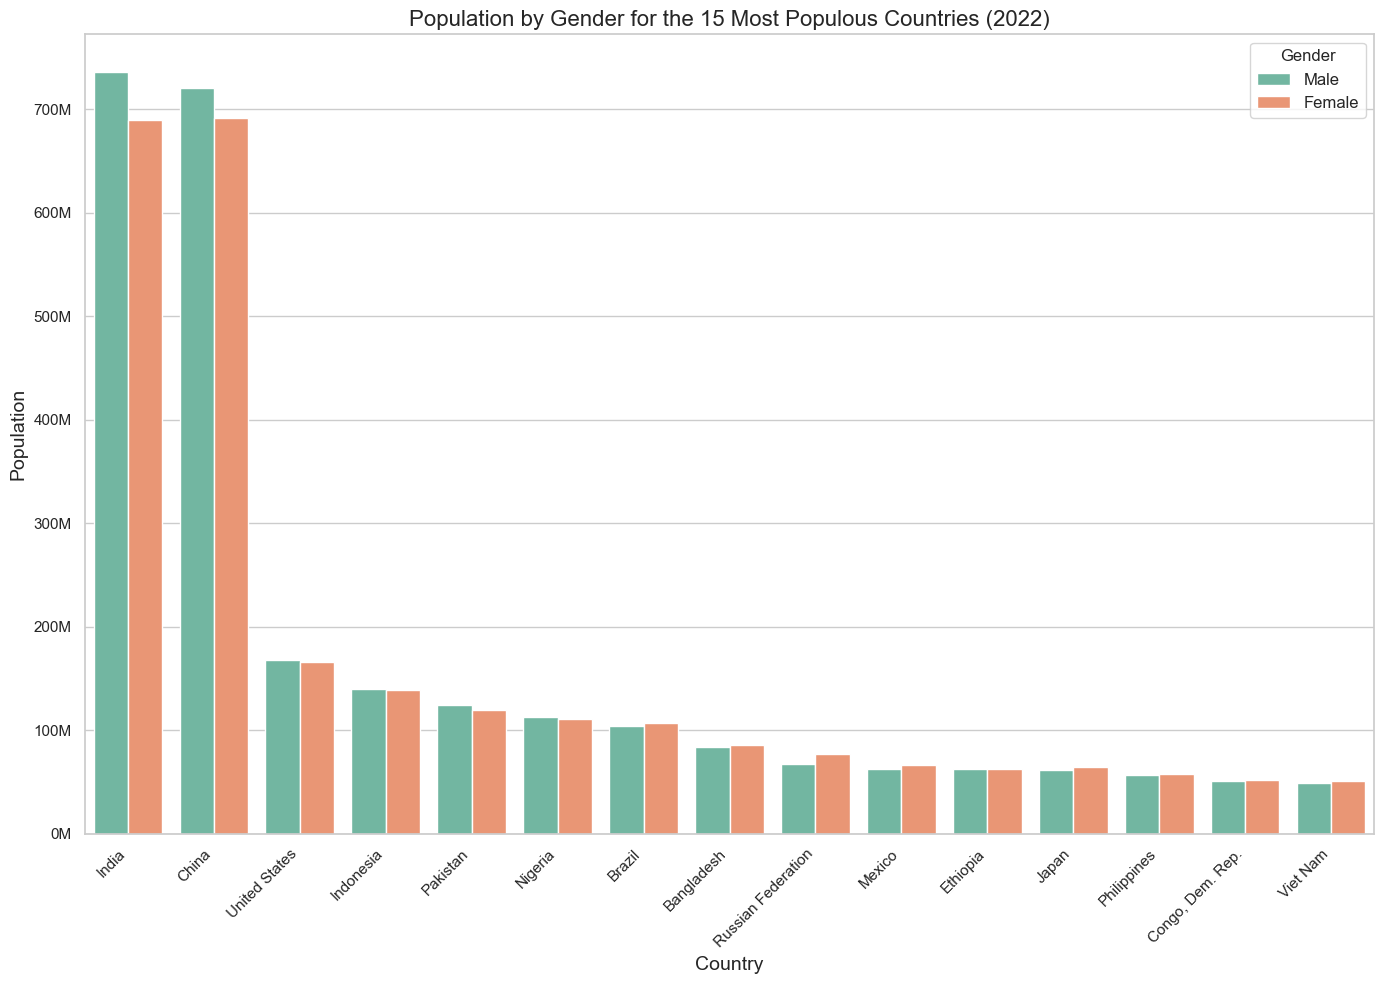

In [29]:

# Let's remove the "Least developed countries: UN classification" and "Africa Eastern and Southern"
# as they are not individual countries
top_countries = top_20_actual_countries[~top_20_actual_countries['country_name'].isin([
    'Least developed countries: UN classification', 'Africa Eastern and Southern'
])].nlargest(15, 'total_population')

# Create a DataFrame for visualization with melted data
plot_data = pd.melt(
    top_countries, 
    id_vars=['country_name', 'total_population'],
    value_vars=['male_population', 'female_population'],
    var_name='gender', 
    value_name='population'
)

# Clean up gender labels for better display
plot_data['gender'] = plot_data['gender'].str.replace('_population', '').str.capitalize()

# Sort countries by total population for visualization
plot_data['country_name'] = pd.Categorical(
    plot_data['country_name'], 
    categories=top_countries.sort_values('total_population', ascending=False)['country_name'].tolist(),
    ordered=True
)

# Create the plot
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the bar plot
ax = sns.barplot(
    data=plot_data,
    x='country_name', 
    y='population',
    hue='gender',
    errorbar=None
)

# Customize the plot
plt.title('Population by Gender for the 15 Most Populous Countries (2022)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', fontsize=12)

# Format y-axis labels to show billions/millions
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    else:
        return f'{x/1e6:.0f}M'

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

# Add data labels for readability
plt.tight_layout()
plt.show()


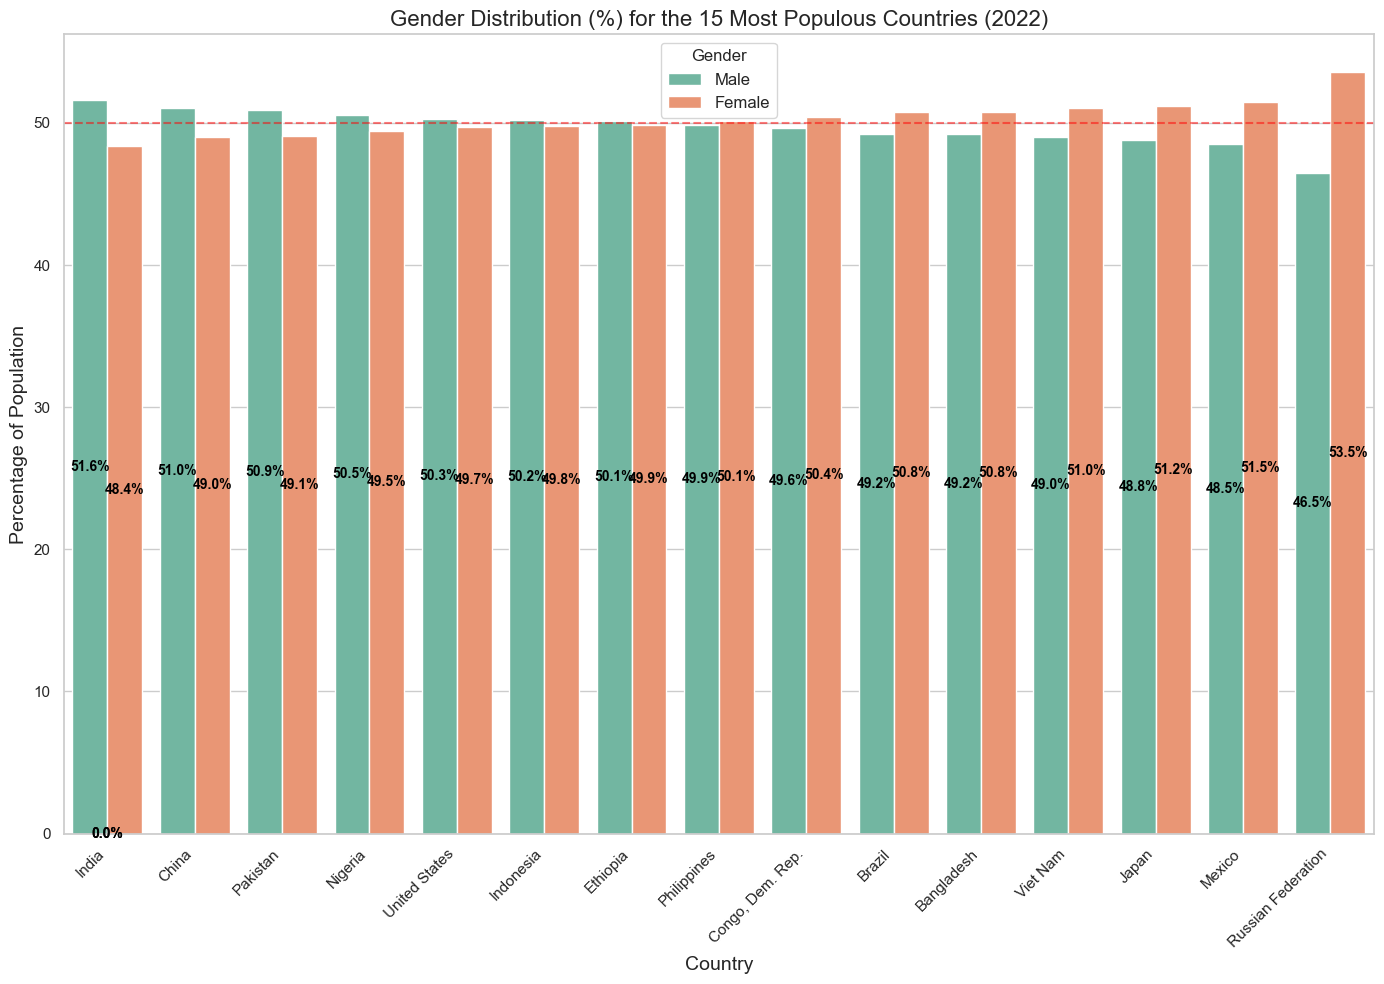

In [30]:

# Create a percentage stacked bar chart
plt.figure(figsize=(14, 10))

# Prepare data for percentage plot
percentage_data = top_countries.copy()
percentage_data = pd.melt(
    percentage_data,
    id_vars=['country_name'],
    value_vars=['male_percentage', 'female_percentage'],
    var_name='gender',
    value_name='percentage'
)

# Clean up gender labels
percentage_data['gender'] = percentage_data['gender'].str.replace('_percentage', '').str.capitalize()

# Sort by male percentage for visualization
sorted_countries = top_countries.sort_values('male_percentage', ascending=False)['country_name'].tolist()
percentage_data['country_name'] = pd.Categorical(
    percentage_data['country_name'],
    categories=sorted_countries,
    ordered=True
)

# Create the plot
sns.set_style("whitegrid")
sns.set_palette("Set2")
ax = sns.barplot(
    data=percentage_data,
    x='country_name',
    y='percentage',
    hue='gender',
    errorbar=None
)

# Customize the plot
plt.title('Gender Distribution (%) for the 15 Most Populous Countries (2022)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage of Population', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', fontsize=12)

# Add a horizontal line at 50%
plt.axhline(y=50, color='red', linestyle='--', alpha=0.5)

# Add data labels
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), 
                ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()
